## Analysis of Ad marketing campaign

### Classic and sequential A/B testing analysis

In [48]:
#importing important packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.stats.api as sms
import scipy.stats as st


In [49]:
#importing ad csv data using pandas
ad_data = pd.read_csv("ABAdRecall.csv")

In [50]:
#showing five top rows
ad_data.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
auction_id     8077 non-null object
experiment     8077 non-null object
date           8077 non-null object
hour           8077 non-null int64
device_make    8077 non-null object
platform_os    8077 non-null int64
browser        8077 non-null object
yes            8077 non-null int64
no             8077 non-null int64
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
#making sure data doesnt have missed value or null value
ad_data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [6]:
#Check how many duplicated users exist
print(ad_data['auction_id'].count())
print(ad_data['auction_id'].nunique())


8077
8077


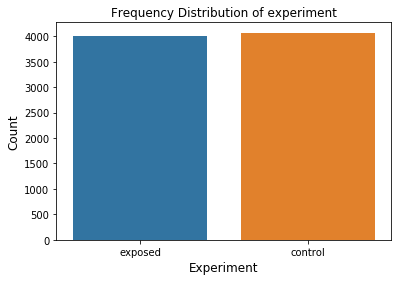

In [14]:
#Bar plot showing number of experiment catagory
sns.countplot(ad_data['experiment'])
plt.title('Frequency Distribution of experiment')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experiment', fontsize=12)
plt.show()

Observations

Recipients of both the experiment are almost equally included in the campaign.

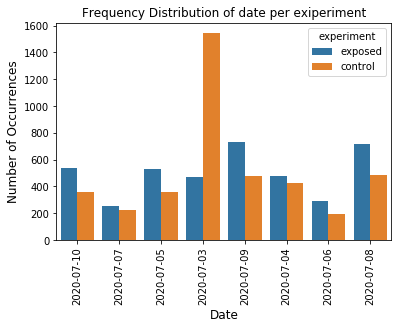

In [23]:
#plot of date when data is provided per experiment
sns.countplot(x="date", hue="experiment", data=ad_data)
plt.xticks(rotation='vertical')
plt.title('Frequency Distribution of date per exiperiment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()

Observations

The top date the campaign got more response is on 2020-07-03 and low response on 2020-07-07

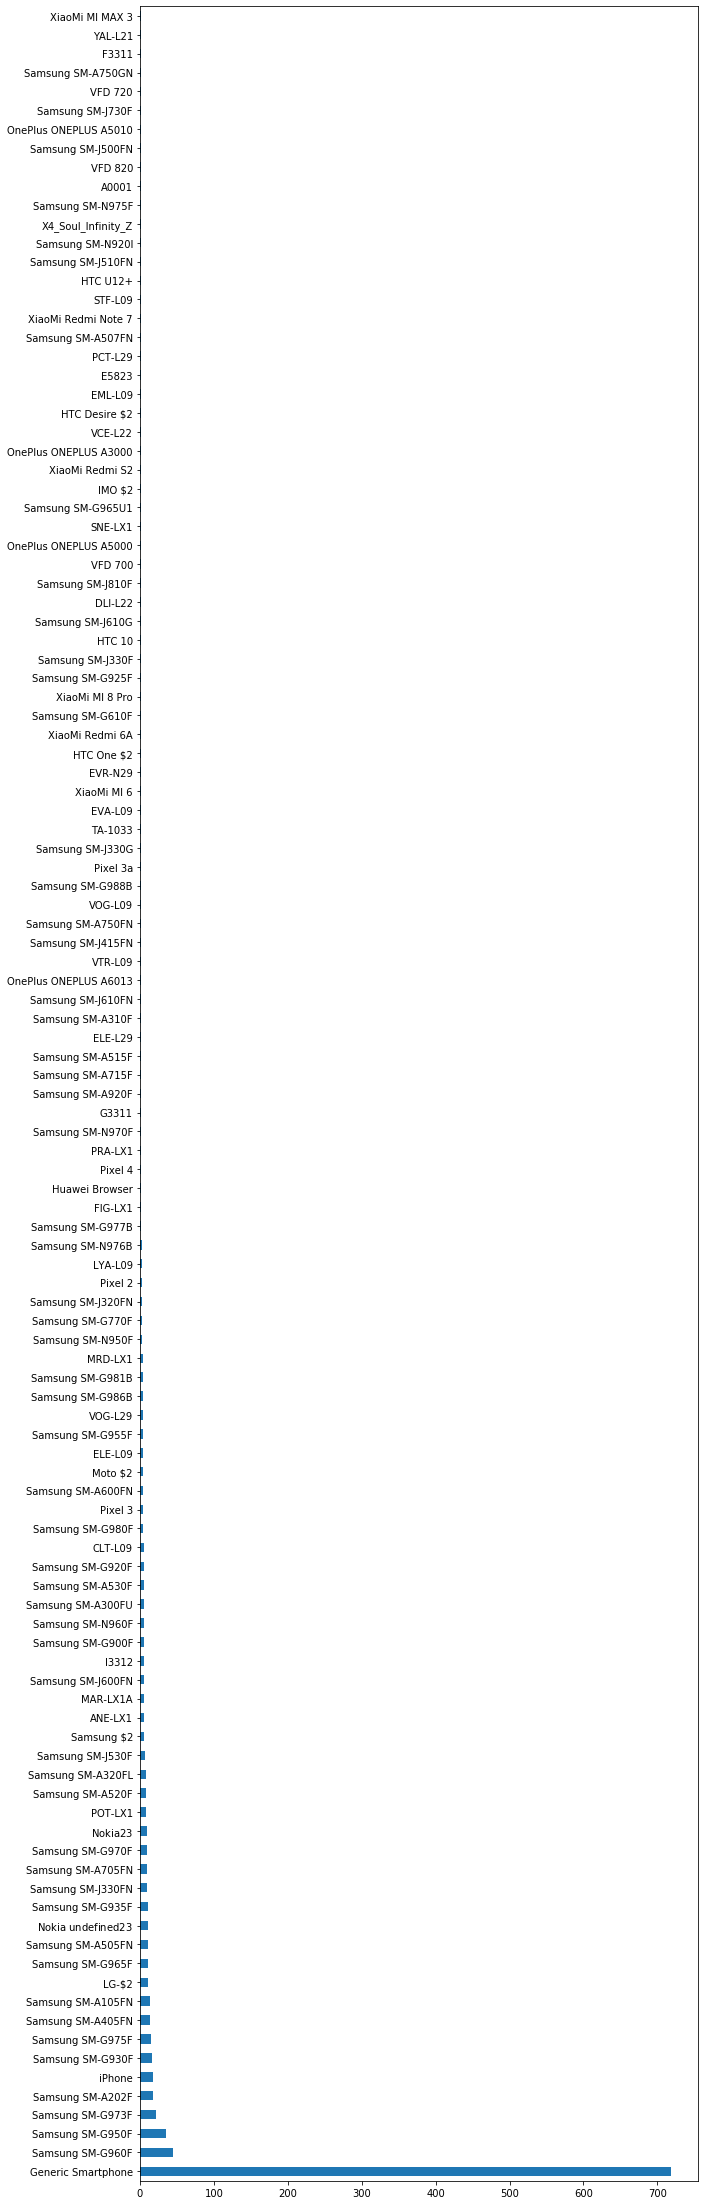

In [46]:
#plot of device type used 
plt.figure(figsize=(10,40))
ad_data['device_make'].value_counts().plot(kind='barh')

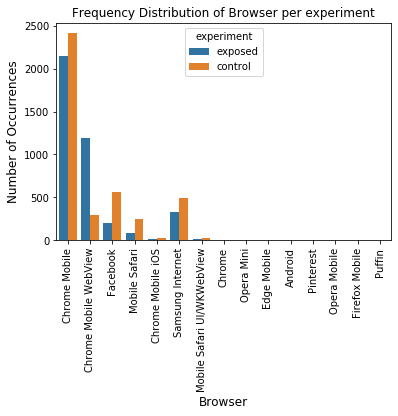

In [25]:
#plot of browser used
sns.countplot(x="browser", hue="experiment", data=ad_data)
plt.xticks(rotation='vertical')
plt.title('Frequency Distribution of Browser per experiment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Browser', fontsize=12)
plt.show()

Observations

Most of the users in ad campaign uses Chrome Mobile and Chrome Mobile WebView

In [35]:
ad_data['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

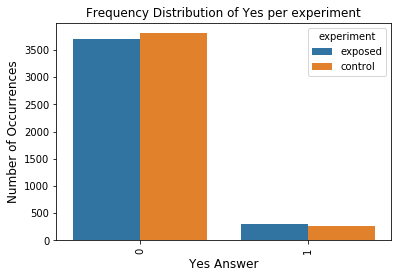

In [27]:
#distribution of yes
sns.countplot(x='yes', hue='experiment',data=ad_data)
plt.xticks(rotation='vertical')
plt.title('Frequency Distribution of Yes per experiment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Yes Answer', fontsize=12)
plt.show()


In [36]:
ad_data['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

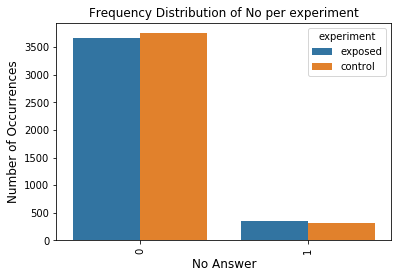

In [28]:
#distribution of no

sns.countplot(x='no', hue='experiment',data=ad_data)
plt.xticks(rotation='vertical')
plt.title('Frequency Distribution of No per experiment')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('No Answer', fontsize=12)
plt.show()

In [29]:
#Number of user who responded yes in control group
ad_data[ad_data['experiment'] == 'control']['yes'].value_counts()

0    3807
1     264
Name: yes, dtype: int64

In [30]:
#number of user who responded no in control group
ad_data[ad_data['experiment'] == 'control']['no'].value_counts()

0    3749
1     322
Name: no, dtype: int64

In [31]:
#Number of user who responded yes in exposed group
ad_data[ad_data['experiment'] == 'exposed']['yes'].value_counts()

0    3698
1     308
Name: yes, dtype: int64

In [32]:
#Number of user who responded no in exposed group
ad_data[ad_data['experiment'] == 'exposed']['no'].value_counts()

0    3657
1     349
Name: no, dtype: int64

In [33]:
#The user may see the BIO questionnaire but choose not to respond. since we dont want when user choose not respond we drop the
# rows that has both yes and no 0.
mask = (ad_data['yes'] == 0) & (ad_data['no'] == 0)
index_to_drop = ad_data[mask].index
ad_data = ad_data.drop(index_to_drop)

print(ad_data.shape)
ad_data["experiment"].value_counts()

(1243, 9)


exposed    657
control    586
Name: experiment, dtype: int64

In [34]:
ad_data.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
1519,321e2198-aa78-422d-92f5-4783f7c78c1e,exposed,2020-07-09,3,Generic Smartphone,6,Chrome Mobile,1,0
466,0ded142b-aadd-45aa-9343-8b1c7b04df8c,control,2020-07-03,15,POT-LX1,6,Facebook,0,1
5143,a3af7c56-caf7-4ee0-bdfd-d5514dd03fbb,exposed,2020-07-08,18,Samsung SM-G950F,6,Chrome Mobile WebView,1,0
2791,59dbd61a-a0ac-45ee-9d7f-18ab30295485,control,2020-07-07,3,Generic Smartphone,6,Chrome Mobile,0,1
3854,7c484dcc-d619-416b-80a1-2b5995ce0ccf,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1


In [36]:
#Show the % split between users who responded yes and no
mask = (ad_data["experiment"] == "control")
yes_control = ad_data["yes"][mask].sum()
total_users_control = ad_data["yes"][mask].count()

mask = (ad_data['experiment']== 'exposed')
yes_exposed = ad_data['yes'][mask].sum()
total_users_exposed =ad_data['yes'][mask].count()

print("Split of control users who responded yes vs exposed users who responded yes: ", 
          round(total_users_control / ad_data["yes"].count() * 100, 2), "% ",
          round((total_users_exposed / ad_data["yes"].count()) * 100, 2), "%")

#count number of users who responded yes in each group
print("Number of control users who responded yes: ", yes_control)
print("Percentage of control users who responded yes: ", round((yes_control / total_users_control) * 100, 2), "%")

print("Number of exposed users who responded yes: ", yes_exposed)
print("Percentage of exposed users who responded yes: ", round((yes_exposed/ total_users_exposed) * 100, 2), "%")


Split of control users who responded yes vs exposed users who responded yes:  47.14 %  52.86 %
Number of control users who responded yes:  264
Percentage of control users who responded yes:  45.05 %
Number of exposed users who responded yes:  308
Percentage of exposed users who responded yes:  46.88 %


### Set test parameters 

In [38]:
#Check what sample size is required
baseline_rate = yes_control / total_users_control
practical_significance = 0.01 #user defined
confidence_level = 0.05 #user defined, for a 95% confidence interval
sensitivity = 0.8 #user defined

effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("Required sample size: ", round(sample_size), " per group")

Required sample size:  38932  per group


## A/B Test

In [41]:
#Calculate pooled probability
prob_pooled = (yes_control + yes_exposed) / (total_users_control + total_users_exposed)

In [42]:
#Calculate pooled standard error and margin of error
se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (1 / total_users_control + 1 / total_users_exposed))
z_score = st.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate dhat, the estimated difference between probability of conversions in the exposed and control groups
d_hat = (yes_exposed / total_users_exposed) - (yes_control / total_users_control)

#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error

if practical_significance < lower_bound:
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")
    
print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")

Do not reject the null hypothesis
The lower bound of the confidence interval is  -3.72 %
The upper bound of the confidence interval is  7.38 %


**From above a/b test we can conclude that the null hypothesis is true. This means the hypothesis that there is no difference in brand awareness between the exposed and control groups in the current case is true. The sample is not enough to measure the significance of new ad version. Based on the limited sample data, I cannot draw a definite conclusion. More data should be collected and further testing is absolutely needed.**